In [1]:
import pandas as pd
import csv
import numpy 
import time 
from math import radians, cos, sin, asin, sqrt
import re, math
import matplotlib.pyplot as plt
from haversine import haversine
%matplotlib inline

In [2]:
df = pd.DataFrame.from_csv('D:/Nanohub/TribeFlow/TF_location_2015.csv', sep ='\t', encoding = 'UTF-8', header = None)
df.columns = ['ip','resource id','datetime','latitude','longitude']
df = df[df['latitude'] != 0.0000]
df_unique_ip = df.drop_duplicates(subset = 'ip', keep = 'first')

In [3]:
long_dist = []
lat_dist = []
for index,row in df_unique_ip.iterrows():
    lat_dist.append(row['latitude'])
    long_dist.append(row['longitude'])

In [4]:
print(len(long_dist))
print(len(lat_dist))

5329
5329


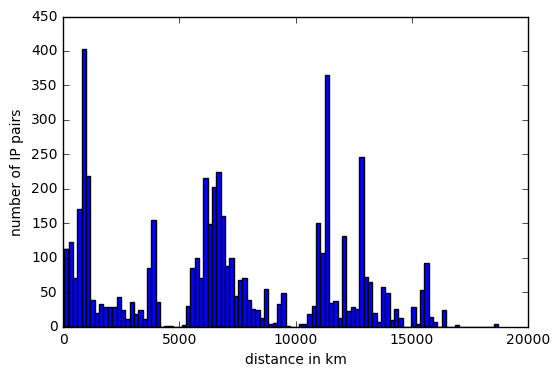

In [39]:
#One to All IP addresses distance histogram
ip_dist = []
k = 5200
loc2 = (lat_dist[k],long_dist[k])
for j in range(len(long_dist)):
    if j != k:
        loc1 = (lat_dist[j],long_dist[j])        
        hav = haversine(loc1,loc2)
        if hav>0:
            ip_dist.append(hav)
plt.hist(ip_dist,100)
plt.xlabel('distance in km')
plt.ylabel('number of IP pairs')

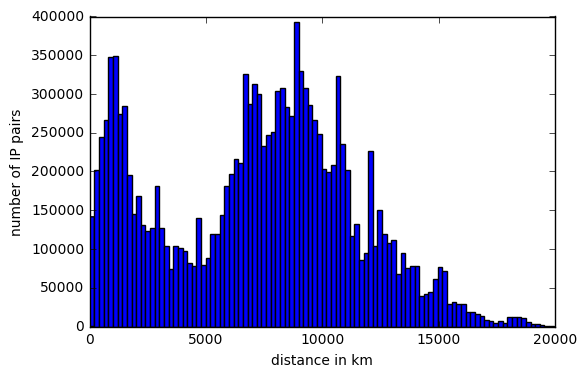

In [15]:
#All IP addresses
count = 0
ip_dist = []
for j in range(len(long_dist)-1):
    for k in range(j+1,len(long_dist)-1):
        loc1 = (lat_dist[j],long_dist[j]) 
        loc2 = (lat_dist[k],long_dist[k])
        hav = haversine(loc1,loc2)
        if (hav >0):
            count +=1
            ip_dist.append(hav)
plt.hist(ip_dist,100)
plt.xlabel('distance in km')
plt.ylabel('number of IP pairs')

In [16]:
count

14028514

([<matplotlib.axis.XTick at 0x28682bbe8d0>,
 <a list of 10 Text xticklabel objects>)

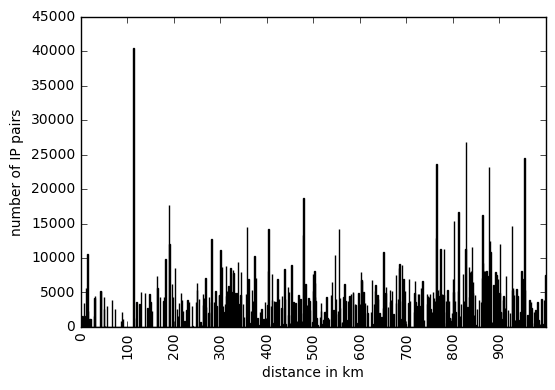

In [18]:
#All IP addresses
ip_dist = []
for j in range(len(long_dist)-1):
    for k in range(j+1, len(long_dist)-1):
        loc1 = (lat_dist[j],long_dist[j]) 
        loc2 = (lat_dist[j+1],long_dist[j+1])
        hav = haversine(loc1,loc2)
        if(hav < 1000) and (hav >0):
            ip_dist.append(hav)
plt.hist(ip_dist,1000)
plt.xlabel('distance in km')
plt.ylabel('number of IP pairs')
plt.xticks(range(0,1000,100),rotation='vertical')

In [ ]:
numpy.mean(ip_dist)
numpy.min(ip_dist)